In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step
C:\Users\student\anaconda3\envs\data_analysis\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\student\anaconda3\envs\data_analysis\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [3]:
import pandas as pd

news_data_df = pd.DataFrame(train_data)
news_labels_df = pd.DataFrame(train_labels)

news_df = pd.DataFrame(news_data_df)
news_df.columns=['train_data']
news_df['train_labels'] = news_labels_df
news_df

,train_data,train_labels
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [4]:
news_df.shape

(8982, 2)

In [5]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    8982 non-null   object
 1   train_labels  8982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.5+ KB


In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    print()
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)


In [7]:
def vectorize_sequences_labels(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, labels in enumerate(labels):
        results[i, int(labels)] = 1. 
    return results

y_train = vectorize_sequences_labels(train_labels)
y_test = vectorize_sequences_labels(test_labels)


In [8]:
# from keras.utils.np_utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
# import tensorflow as tf
# leaky_relu = tf.nn.leaky_relu

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = x_train[:1000].astype(float)
partial_x_train = x_train[1000:].astype(float)

y_val = y_train[:1000].astype(float)
partial_y_train = y_train[1000:].astype(float)

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Epoch 1/20
160/160 [==============================] - 2s 9ms/step - loss: 1.5410 - accuracy: 0.6738 - val_loss: 1.0048 - val_accuracy: 0.7930
Epoch 2/20
160/160 [==============================] - 1s 7ms/step - loss: 0.6237 - accuracy: 0.8641 - val_loss: 0.8639 - val_accuracy: 0.8200
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3220 - accuracy: 0.9312 - val_loss: 0.8683 - val_accuracy: 0.8140
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2192 - accuracy: 0.9478 - val_loss: 0.8567 - val_accuracy: 0.8210
Epoch 5/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1787 - accuracy: 0.9534 - val_loss: 0.8851 - val_accuracy: 0.8170
Epoch 6/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1662 - accuracy: 0.9515 - val_loss: 0.8639 - val_accuracy: 0.8040
Epoch 7/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1423 - accuracy: 0.9558 - val_loss: 0.9078 - val_accuracy: 0.8050
Epoch 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
import matplotlib.pyplot as plt

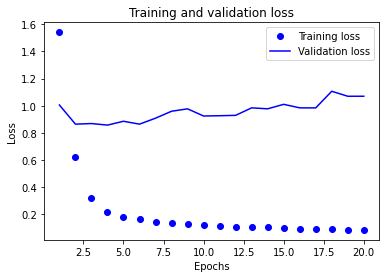

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

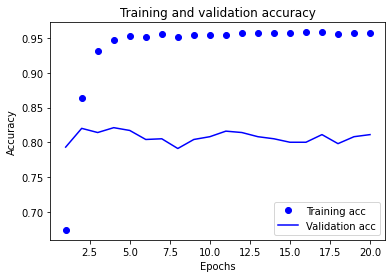

In [17]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
# from tensorflow.keras.layers import LeakyReLU, Activation
# from keras.layers import LeakyReLU


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=3,
          batch_size=30,
          validation_data=(x_val, y_val))

result = model.evaluate(x_test, y_test)

Epoch 1/3
267/267 [==============================] - 2s 5ms/step - loss: 1.5123 - accuracy: 0.6729 - val_loss: 0.9726 - val_accuracy: 0.7860
Epoch 2/3
267/267 [==============================] - 1s 5ms/step - loss: 0.6214 - accuracy: 0.8631 - val_loss: 0.8373 - val_accuracy: 0.8210
Epoch 3/3
71/71 [==============================] - 0s 2ms/step - loss: 0.9325 - accuracy: 0.8028


In [19]:
# model = models.Sequential()
# model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(46, activation='softmax'))

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(partial_x_train,
#           partial_y_train,
#           epochs=3,
#           batch_size=30,
#           validation_data=(x_val, y_val))

# result = model.evaluate(x_test, y_test)
# loss: 0.9454 - accuracy: 0.8019
